In [1]:
''' Import libraries'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.summarization.textcleaner import split_sentences

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE

from textblob import TextBlob, Word, Blobber
# to install textblob in your conda packages:
# 1. go to anaconda prompt
# 2. cd Anaconda3>Scripts>conda install -c conda-forge textblob
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#to accelerate the process create a sample data frame to work on classes and functions instead of the huge original dataframe:

dict_CaryLane={'boutique_name':"Cary Lane", 'number_reviews':3, 'reviews':["I popped in here randomly the other day and was SO surprised! They had several of my favorite designers that I tend to shop online for through Revolve. Everything is brand new and heavily discounted...its like going into the MOST organized designer sample sale ever. I dont know how they do it, but so glad I discovered them! Highly recommend. Its not just one offs either...they have multiple sizes in everything!",
         "Are you tired of paying too much money for fashion and quality clothing. You will be amazed when you walk in this store. They great when you walk in. The merchandise selection is fantastic. Plus if you pay cash you get 10% off.",
         "Let just say I emailed the  owner stating I had no receipt and I made with cash. I'm still waiting several weeks later for what are my options."], 'star_ratings':[5,5,2]}

dict_SanFran={"boutique_name":"San Fran","number_reviews":4, "reviews":["Whenever I come to San Francisco I always look out for cool local shops. This is one of them. Got a really cool hat and a mug. Anytime I'm able to buy a non typical souvenir, I'm happy!",
              "Very, very cool place. The T-shirt's are very soft, and I really liked the designs. Bought a tie dye onesie and a beanie for my granddaughter-on-the-way.  The staff was bright and cheery. I highly recommend this place.", 
              "The staff here at the cafe and ice cream section generally can't be bothered to pretend to care about their customers.", 
              "The staff that is not to bother with really downer vibes. The clothing is not worth the price tag. And in overall the premise of what the brand once was is completely gone. Completely avoid this place"], "star_ratings":[5,3,2,4]}

In [4]:
# display.max_colwidth sets the maximum width of columns. Cells of this length or longer will be truncated with an ellipsis.
pd.options.display.max_colwidth = 1000

In [7]:
df_review1 = pd.DataFrame(dict_CaryLane)
df_review2 = pd.DataFrame(dict_SanFran)
coulmns = ["boutique_name","number_reviews", "star_ratings","reviews"]
df_review = pd.concat([df_review1,df_review2], ignore_index=False)
df_review

,boutique_name,number_reviews,reviews,star_ratings
0,Cary Lane,3,"I popped in here randomly the other day and was SO surprised! They had several of my favorite designers that I tend to shop online for through Revolve. Everything is brand new and heavily discounted...its like going into the MOST organized designer sample sale ever. I dont know how they do it, but so glad I discovered them! Highly recommend. Its not just one offs either...they have multiple sizes in everything!",5
1,Cary Lane,3,Are you tired of paying too much money for fashion and quality clothing. You will be amazed when you walk in this store. They great when you walk in. The merchandise selection is fantastic. Plus if you pay cash you get 10% off.,5
2,Cary Lane,3,Let just say I emailed the owner stating I had no receipt and I made with cash. I'm still waiting several weeks later for what are my options.,2
0,San Fran,4,"Whenever I come to San Francisco I always look out for cool local shops. This is one of them. Got a really cool hat and a mug. Anytime I'm able to buy a non typical souvenir, I'm happy!",5
1,San Fran,4,"Very, very cool place. The T-shirt's are very soft, and I really liked the designs. Bought a tie dye onesie and a beanie for my granddaughter-on-the-way. The staff was bright and cheery. I highly recommend this place.",3
2,San Fran,4,The staff here at the cafe and ice cream section generally can't be bothered to pretend to care about their customers.,2
3,San Fran,4,The staff that is not to bother with really downer vibes. The clothing is not worth the price tag. And in overall the premise of what the brand once was is completely gone. Completely avoid this place,4


In [8]:
#review related dataframe will contain "number_reviews", "star_ratings", "reviews" and "boutique_name" information.
''' 
#write a function to separate all the related info for each boutiques:
#1.group dataframe by each boutique_name using groupby method.
#2.use the average star_ratings of all reviews as the unique star_rating of the boutique.
#3.add all reviews of each boutique into one single list to analyse feedbacks, visualize results and create prediction models.
#4.the average number of reviews will remain the same for each boutique.
'''

def df_checklist(dataframe):
    #agg_function = {"number_reviews":lambda x: x.mean(), "star_ratings":lambda x: x.mean(), "reviews": lambda x:list(x)}
    agg_function = {"number_reviews":lambda x: x.mean(), "star_ratings":lambda x: x.mean(), "reviews": lambda x:x.sum()}
    #create DataFrameGroupBy object and conver it to dataframe using aggregate method:
    df = dataframe.groupby("boutique_name").aggregate(agg_function).reset_index()
    return df 

In [9]:
df = df_checklist(df_review)
df

,boutique_name,number_reviews,star_ratings,reviews
0,Cary Lane,3,4.0,"I popped in here randomly the other day and was SO surprised! They had several of my favorite designers that I tend to shop online for through Revolve. Everything is brand new and heavily discounted...its like going into the MOST organized designer sample sale ever. I dont know how they do it, but so glad I discovered them! Highly recommend. Its not just one offs either...they have multiple sizes in everything!Are you tired of paying too much money for fashion and quality clothing. You will be amazed when you walk in this store. They great when you walk in. The merchandise selection is fantastic. Plus if you pay cash you get 10% off.Let just say I emailed the owner stating I had no receipt and I made with cash. I'm still waiting several weeks later for what are my options."
1,San Fran,4,3.5,"Whenever I come to San Francisco I always look out for cool local shops. This is one of them. Got a really cool hat and a mug. Anytime I'm able to buy a non typical souvenir, I'm happy!Very, very cool place. The T-shirt's are very soft, and I really liked the designs. Bought a tie dye onesie and a beanie for my granddaughter-on-the-way. The staff was bright and cheery. I highly recommend this place.The staff here at the cafe and ice cream section generally can't be bothered to pretend to care about their customers.The staff that is not to bother with really downer vibes. The clothing is not worth the price tag. And in overall the premise of what the brand once was is completely gone. Completely avoid this place"


In [11]:
# test:
pd.options.display.max_colwidth = 1000
rows = df[(df.boutique_name == 'Cary Lane')]
reviews = rows.reviews.to_string()
# reviews = rows.reviews
reviews

"0    I popped in here randomly the other day and was SO surprised! They had several of my favorite designers that I tend to shop online for through Revolve. Everything is brand new and heavily discounted...its like going into the MOST organized designer sample sale ever. I dont know how they do it, but so glad I discovered them! Highly recommend. Its not just one offs either...they have multiple sizes in everything!Are you tired of paying too much money for fashion and quality clothing. You will be amazed when you walk in this store. They great when you walk in. The merchandise selection is fantastic. Plus if you pay cash you get 10% off.Let just say I emailed the  owner stating I had no receipt and I made with cash. I'm still waiting several weeks later for what are my options."

In [12]:
def text_cleaning(text):
    """
    This function cleans a block of text.
    Input:text = the text to be cleaned.
    Output: the text stripped of punctuation and made lowercase.
    """
    # u'\xa0' represents a non-breaking space in the text block that needs to be removed.
    text = text.replace(u'\xa0', u' ')
    
    #remove multiple fullstops and make a single fullstop
    text = re.sub('\.+', '. ', text)
 
    #remove multiple spaces and make a single space.
    text = re.sub(' +', ' ', text)
    
    #remove all tokens that are not alphabetic
    text = re.sub(r'\d+', '', text)
    
    #normalization
    text= text.lower()
    
    #remove punctuations
    #punctuation marks, add . if needs be
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
    #traverse the given string and if any punctuation marks occur replace it with null 
    for i in text: 
        if i in punctuations: 
            text = text.replace(i, "") 
                    
    return text 

In [29]:
#word embedding model:
from gensim.models import Word2Vec
# 1.define training data:
# sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# ['this', 'is', 'the', 'second', 'sentence'],
# ['yet', 'another', 'sentence'],
# ['one', 'more', 'sentence'],
# ['and', 'the', 'final', 'sentence']]

reviews = text_cleaning(reviews)
reviews

sentences = nltk.sent_tokenize(reviews)
sentences = [nltk.word_tokenize(sentence)for sentence in sentences]
# print(sentences)

dot = "."
for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]
    sentences[i] = [word for word in sentences[i] if word not in dot]
print(sentences)    


#2.train model
model = Word2Vec(sentences, min_count=1)

#summarize the loaded model
print(model)

#summarize vocabulary
words = list(model.wv.vocab)
print(words)

# access vector for one word
print(model['cash'])

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

[['popped', 'randomly', 'day', 'surprised', 'several', 'favorite', 'designers', 'tend', 'shop', 'online', 'revolve'], ['everything', 'brand', 'new', 'heavily', 'discounted'], ['like', 'going', 'organized', 'designer', 'sample', 'sale', 'ever'], ['dont', 'know', 'glad', 'discovered', 'highly', 'recommend'], ['one', 'offs', 'either'], ['multiple', 'sizes', 'everythingare', 'tired', 'paying', 'much', 'money', 'fashion', 'quality', 'clothing'], ['amazed', 'walk', 'store'], ['great', 'walk'], ['merchandise', 'selection', 'fantastic'], ['plus', 'pay', 'cash', 'get'], ['let', 'say', 'emailed', 'owner', 'stating', 'receipt', 'made', 'cash'], ['im', 'still', 'waiting', 'several', 'weeks', 'later', 'options']]
Word2Vec(vocab=66, size=100, alpha=0.025)
['popped', 'randomly', 'day', 'surprised', 'several', 'favorite', 'designers', 'tend', 'shop', 'online', 'revolve', 'everything', 'brand', 'new', 'heavily', 'discounted', 'like', 'going', 'organized', 'designer', 'sample', 'sale', 'ever', 'dont', '

C:\Users\farnaz\anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


C:\Users\farnaz\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


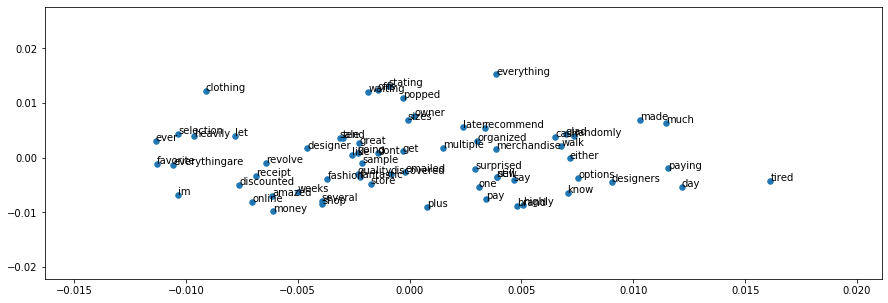

In [38]:
#word embedding visualization:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
# from pylab import rcParams
# rcParams['figure.figsize'] = 15, 5

pyplot.scatter(result[:, 0], result[:, 1] , s=30)
words = list(model.wv.vocab)
for i, word in enumerate(words):
    
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()